In [1]:
import tensorflow.keras as tf
from tensorflow.keras import datasets
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
help(datasets)

Help on package keras.api._v2.keras.datasets in keras.api._v2.keras:

NAME
    keras.api._v2.keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    c:\users\suni5\appdata\roaming\python\python39\site-packages\keras\api\_v2\keras\datasets\__init__.py




In [3]:
mnist = datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train.ndim

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3

# use matplotlib to show the digit(2) 

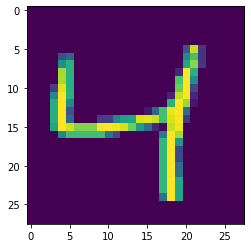

In [ ]:
# This loop will show the number 2
'''
for i in range(10):
  if(Y_train[i] == 2):
    print("Number is and Index is ", Y_train[i],i)
    plt.imshow(X_train[i])
    plt.show()
    break
'''
plt.imshow(X_train[2])
plt.show()

## Data Pre-processing
  - Reshape/Flatten the input image to 28 * 28
  - Convert the label to categorical (0 to 9) 10

In [ ]:
# Flatten the input images to 784 
input_shape = 28 * 28 
X_train_org = X_train
X_test_org = X_test
X_train = X_train.reshape(60000, input_shape)
X_test = X_test.reshape(10000, input_shape)

X_train = X_train/255
X_test = X_test/255

# As there are 10 digits (0 - 9), create 10 class labels in output data 
Y_train = to_categorical(Y_train)
Y_test_org = Y_test 
Y_test = to_categorical(Y_test)

print("after flattening the shapes are:")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test_org.shape)

after flattening the shapes are:
(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


# Define: Build the model


In [ ]:
def build_model(optimizer, loss):
  # create sequential Keras models and layers 
  # create 3 hidden layers with 32,64,128 neurons respectively 
 
  model = Sequential()
  model.add(Dense(32, input_shape = (784,), activation = 'relu' )) # Param = (784 * 32) + 32 = 25, 120
  model.add(Dense(64, activation = 'relu' ))    # Param = (32 * 64) + 64 = 2112
  model.add(Dense(128, activation = 'relu' ))                      # Param = (64 * 128) + 128 = 8320
  model.add(Dense(10, activation = 'softmax' ))                    # Param = (10*128) + 10 = 1290 

  # use model.compile for loss  = categorical_crossentropy, optimizer='Adam', metrics=['accuracy'#
  model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

  # model summary
  model.summary()  

  return model 

    
  '''
  # or like below 
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(32, activation = 'relu' ))  
  model.add(Dense(64, activation = 'relu' ))    # Param = (32 * 64) + 64 = 2112
  model.add(Dense(128, activation = 'relu' ))                      # Param = (64 * 128) + 128 = 8320
  model.add(Dense(10, activation = 'softmax' ))   

  '''  


# # Define: Train the model 

In [ ]:
def train_model(model, n_epochs):
    history = model.fit(X_train, Y_train, batch_size = 10, epochs = n_epochs, validation_data = (X_test, Y_test))

    return history

# # Define: evaluate the loss and accuracy 

In [ ]:
def Evaluate_Model(seqmodel, X, Y): 
  loss, accuracy = seqmodel.evaluate(X, Y)
  return accuracy

# Define: Plot the accuracy and Loss

In [ ]:
def Plot_Model_Accuracy_Loss(history): 
  print("Keys: ", history.history.keys())

  # Plot the model accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Model accuracy')
  plt.legend(['train', 'test'])
  plt.show()
  print("*************************************")
  # Plot the model loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.title('Model Loss')
  plt.legend(['train', 'test'])
  plt.show()

# Model1: Build, Train, Evaluate and plot the model, with epochs = 20

In [ ]:
model1 = build_model(loss = 'categorical_crossentropy', optimizer = 'adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = train_model(model1, n_epochs = 15)

Epoch 1/15
6000/6000 [==============================] - 24s 4ms/step - loss: 0.2544 - accuracy: 0.9224 - val_loss: 0.1359 - val_accuracy: 0.9585
Epoch 2/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1326 - accuracy: 0.9594 - val_loss: 0.1346 - val_accuracy: 0.9593
Epoch 3/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.1175 - val_accuracy: 0.9659
Epoch 4/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0920 - accuracy: 0.9714 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 5/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0790 - accuracy: 0.9754 - val_loss: 0.1260 - val_accuracy: 0.9658
Epoch 6/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.0724 - accuracy: 0.9765 - val_loss: 0.1036 - val_accuracy: 0.9691
Epoch 7/15
6000/6000 [==============================] - 15s 2ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.1139 - val_ac

In [ ]:
accuracy = Evaluate_Model(model1, X_test, Y_test)
accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9706


0.9706000089645386

Keys:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


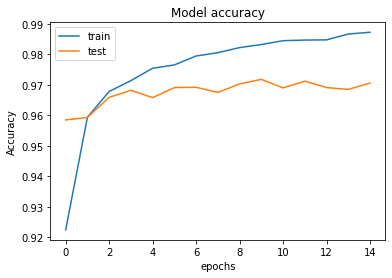

*************************************


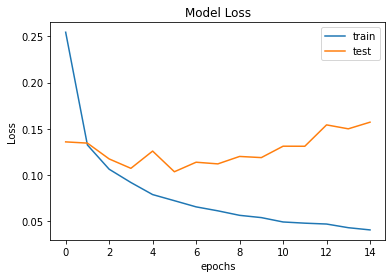

In [ ]:
Plot_Model_Accuracy_Loss(history)

## Predict the outputs on the test data

In [ ]:
y_pred = (model1.predict(X_test))

In [ ]:
print(y_pred[10] )
# The output displays 10 values (as we have 10 output classes) with probabilities for each class.
# Observe which one has highest probability. The first one has max value. So, 
print(np.argmax(y_pred[10]))

[9.9999952e-01 1.1796679e-23 5.0407527e-07 7.8657187e-13 3.1024133e-12
 1.8690034e-12 1.2018952e-09 8.4610878e-09 1.1439453e-11 4.2075129e-08]
0


In [ ]:
y_pred = np.argmax(model1.predict(X_test), axis =1)

# Draw Confusion matrix and heatmap of confusion matrix

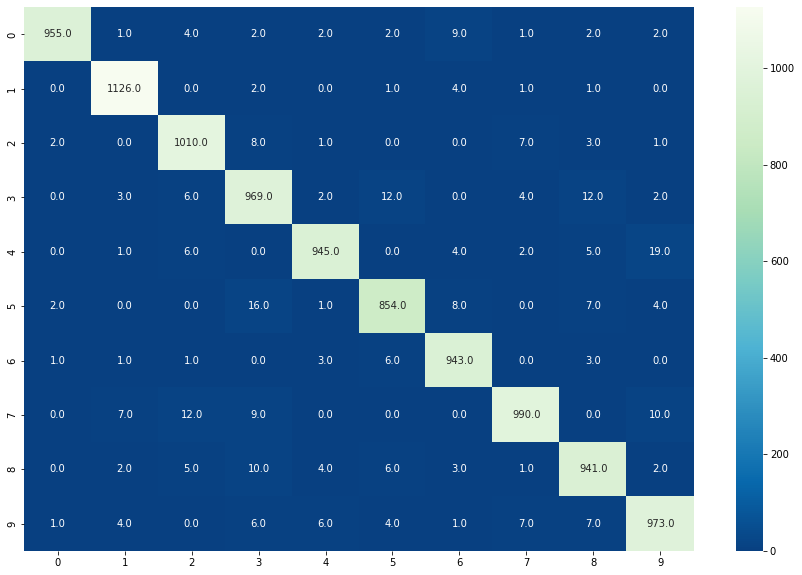

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize= (15,10))
cm = confusion_matrix(Y_test_org, y_pred)
cm

sns.heatmap(cm, annot = True, fmt = '0.1f', cmap = 'GnBu_r')
plt.show()

In [ ]:
wrong_prediction = []
for i in range(len(Y_test_org)): 
    if(Y_test_org[i] != y_pred[i]): 
        wrong_prediction.append(i)

len(wrong_prediction)

294

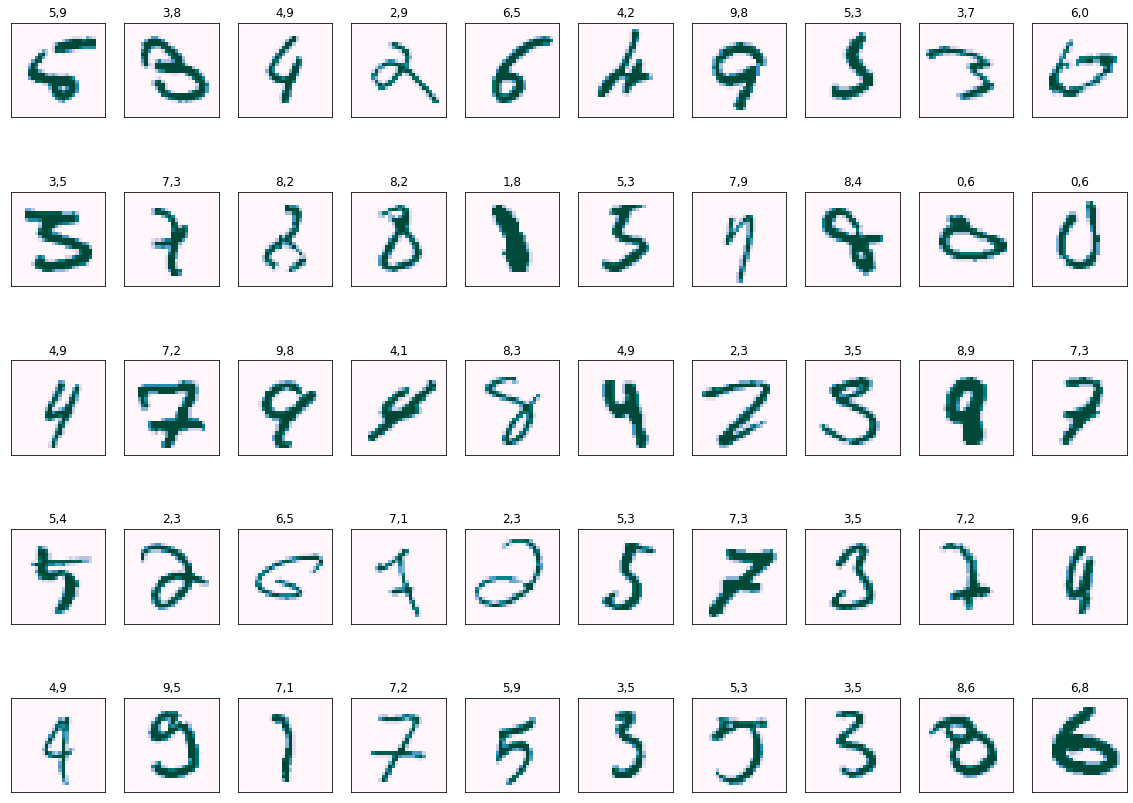

In [ ]:
plt.figure(figsize = (20, 15))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.imshow(X_test_org[wrong_prediction[i]], cmap = 'PuBuGn')
    plt.xticks([])
    plt.yticks([])
    #print(Y_test_new[wrong_prediction[i]], y_pred[wrong_prediction[i]])
    plt.title(str(Y_test_org[wrong_prediction[i]]) + ',' + str(y_pred[wrong_prediction[i]]))
plt.show()

# Save the model 

In [ ]:
model1.save('mnist.h5')

In [ ]:
read_Model = tf.models.load_model('mnist.h5')
read_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


# Read an input which is not part of training data and predict that number

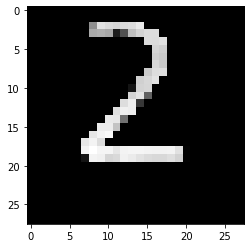

In [ ]:
import cv2
img = cv2.imread("/content/sample_data/2.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img) # Because the original X_test is black ground and 2.img is white background
plt.imshow(img,cmap='gray')
plt.show() 

In [ ]:
input1 = np.array([img])
input_x = input1.reshape(1, 784)

#X_train = X_train.reshape(60000, input_shape)
print((input_x.shape))
pred = model1.predict(input_x)
np.argmax(pred)

(1, 784)


2

# Predict  another input data

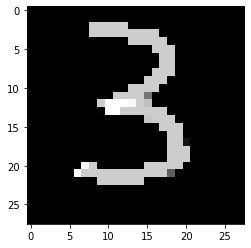

In [ ]:

img2 = cv2.imread('/content/sample_data/3.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (28,28))
img2 = cv2.bitwise_not(img2)
plt.imshow(img2, cmap = 'gray')
plt.show()

In [ ]:
# Convert image into np.array and resize to 784 
nparr = np.array([img2]) 
# reshape the image to same as input shape = (, 784)
#X_train = X_train.reshape(60000, input_shape)
nparr = nparr.reshape(1, 784)

print(nparr.shape)
pred = model1.predict(nparr)
np.argmax(pred)

(1, 784)


3



# Model2: Build, Train, Evaluate and plot the model, with epochs = 50



In [ ]:
model2 = build_model(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
history2 = train_model(model2, n_epochs = 100)

In [ ]:
accuracy2 = Evaluate_Model(model2, X_test, Y_test)
accuracy2

In [ ]:
Plot_Model_Accuracy_Loss(history2)